# Figsetup
Using chou 20210513 unsort data. <br>
shortcaption: A reconstructed kernel from SVD compared with the original kernel<br>
label: real_STK_SVD

In [1]:
filename = 'real_STK_SVD'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

# load files 

In [3]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
direction = 'UD'
ExpData = loadmat(exp_folder+'merge\\merge_0224_Checkerboard_30Hz_27_15min_Br50_Q100', squeeze_me =True)

RFprop  = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat'
                  , squeeze_me =True)


In [4]:
cn = 9
dt = 1/60
timeBinNum = 60
Taxis = np.arange(timeBinNum)*dt

checkerboard = ExpData['bin_pos']
fs = 1.5
GFcheckerboard = np.array([gaussian_filter(cb.astype(float), fs) for cb in checkerboard])
GFCcheckerboard = GFcheckerboard - np.mean(GFcheckerboard, axis = 0)
rstate, _ = np.histogram(ExpData['reconstruct_spikes'][cn-1], np.arange(len(checkerboard)+1)*dt)

In [5]:
STK = np.zeros([timeBinNum,27,27])
for i in range(timeBinNum): #1s
    for ii in np.arange(0, len(checkerboard)-i):
        STK[i,:,:] += rstate[ii+i]*GFCcheckerboard[ii,:,:]
    STK[i,:,:] /= np.sum(rstate[:len(checkerboard)-i])

In [6]:
r = RFprop['RF_properties']['radius']
RFprop = RFprop['RF_properties']
centerx = (RFprop['X_Coor'][cn-1]-BS['leftx_bd'])/(BS['rightx_bd']-BS['leftx_bd'])*27-0.5
centery = (RFprop['Y_Coor'][cn-1]-BS['lefty_bd'])/(BS['righty_bd']-BS['lefty_bd'])*27-0.5

# SVD

In [7]:
rSTK = STK[:,:,:].reshape((STK.shape[0],-1))
U,sigma,VT=np.linalg.svd(rSTK)

In [8]:
sigma/np.sum(sigma)

array([0.18628532, 0.04868457, 0.04146231, 0.03654136, 0.03598186,
       0.03356175, 0.03232673, 0.02973532, 0.02753035, 0.02719149,
       0.02555667, 0.0250933 , 0.02305748, 0.02286642, 0.02205487,
       0.02146124, 0.01917402, 0.01876313, 0.01795403, 0.01729014,
       0.01704447, 0.01661698, 0.01580708, 0.01496271, 0.0141477 ,
       0.0131511 , 0.01309089, 0.01228124, 0.01196197, 0.01128178,
       0.01097613, 0.01027374, 0.00991452, 0.00968256, 0.00888758,
       0.00815986, 0.00774709, 0.0072162 , 0.00694175, 0.00666991,
       0.0060586 , 0.00584418, 0.00522147, 0.00519361, 0.00476832,
       0.00428073, 0.00408473, 0.00370047, 0.00334553, 0.00302814,
       0.00252394, 0.00249425, 0.00230793, 0.00176902, 0.00167902,
       0.00152203, 0.00102222, 0.00085442, 0.00060446, 0.00030931])

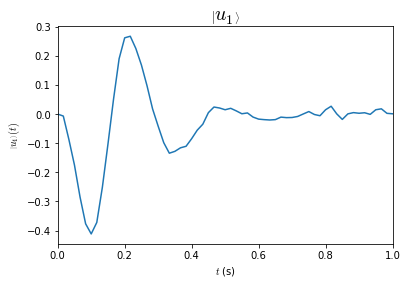

In [9]:
plt.plot(np.arange(timeBinNum+1)*dt, np.append(0,U[:,0]))
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$\left| u_1 \right\rangle(t)$')
plt.title(r'$\left| u_1 \right\rangle$', fontsize=20)
plt.xlim([0,1])
# plt.gcf().set_size_inches(3,1.5)
plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\u1.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

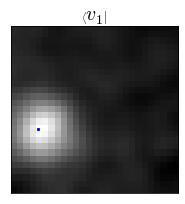

In [10]:
plt.imshow( VT[0,:].reshape((27,27)) , cmap='gray')
plt.title(r'$\left\langle {v_1} \right|$', fontsize=20)
plt.scatter(centerx,centery, c = 'b', s = 5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gcf().set_size_inches(3,3.5)
plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\v1.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

# STK vs SVD1STK

In [12]:
SVDtogather =VT[0,:].reshape((27,27))* U[0,0]
STKtogather = STK[0,:,:]
for i in np.arange(1,18):
    SVDtogather = np.hstack((SVDtogather, VT[0,:].reshape((27,27)) * U[i,0] ))
    STKtogather = np.hstack((STKtogather, STK[i,:,:] ))
Togather = np.vstack((STKtogather, SVDtogather))
imshowdict = {'cmap': 'gray',
              'vmin': np.min(Togather),
              'vmax': np.max(Togather)}

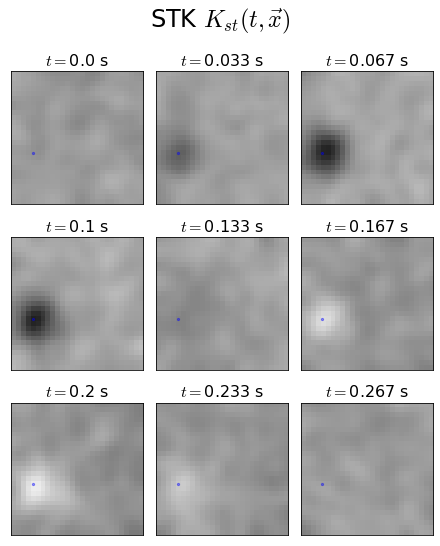

In [13]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in np.arange(9):
    ax.flatten()[i].imshow(STK[i*2,:,:], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(np.round((i*2)/60, 3))+' s', fontsize = 16)
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
    ax.flatten()[i].scatter(centerx,centery, c = 'b', s = 5, alpha = 0.4)
# fig.tight_layout()
fig.suptitle(r'STK $K_{st}(t,\vec{x})$', fontsize=24)
fig.set_size_inches(6,7.5)

fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\real_STK.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

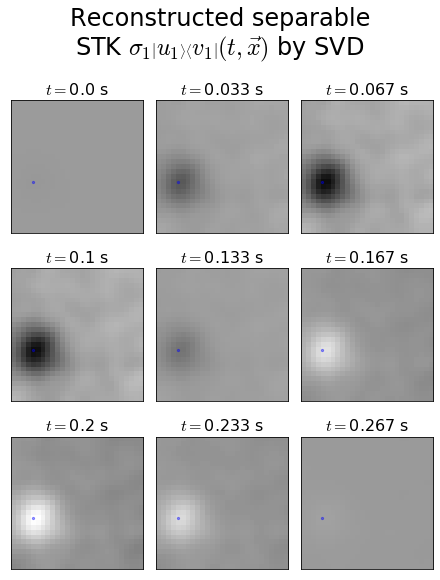

In [14]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in range(9):
    ax.flatten()[i].imshow(VT[0,:].reshape((27,27)) * U[i*2,0], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(np.round((i)/30, 3))+' s', fontsize = 16)
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
    ax.flatten()[i].scatter(centerx,centery, c = 'b', s = 5, alpha = 0.4)
# fig.tight_layout()
fig.suptitle('Reconstructed separable\n'+r'STK $\sigma_1 \left| u_1 \right\rangle \left\langle {v_1} \right|(t,\vec{x})$ by SVD', fontsize=24)
fig.set_size_inches(6,8)

fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\real_SeSTK.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)